In [1]:
import akshare as ak
hs300 = ak.stock_zh_index_daily(symbol="sh000300")
hs300

,open,high,low,close,volume
date,,,,,
2002-01-04,1316.455,1316.455,1316.455,1316.455,0.000000e+00
2002-01-07,1302.084,1302.084,1302.084,1302.084,0.000000e+00
2002-01-08,1292.714,1292.714,1292.714,1292.714,0.000000e+00
2002-01-09,1272.645,1272.645,1272.645,1272.645,0.000000e+00
2002-01-10,1281.261,1281.261,1281.261,1281.261,0.000000e+00
...,...,...,...,...,...
2021-04-06,5178.640,5181.149,5125.330,5140.342,1.098342e+10
2021-04-07,5141.656,5141.656,5065.193,5103.743,1.457637e+10
2021-04-08,5078.263,5129.132,5062.073,5112.209,1.417710e+10


In [2]:
hs300['average_price']=(hs300['high']+hs300['low'])/2
hs300

,open,high,low,close,volume,average_price
date,,,,,,
2002-01-04,1316.455,1316.455,1316.455,1316.455,0.000000e+00,1316.4550
2002-01-07,1302.084,1302.084,1302.084,1302.084,0.000000e+00,1302.0840
2002-01-08,1292.714,1292.714,1292.714,1292.714,0.000000e+00,1292.7140
2002-01-09,1272.645,1272.645,1272.645,1272.645,0.000000e+00,1272.6450
2002-01-10,1281.261,1281.261,1281.261,1281.261,0.000000e+00,1281.2610
...,...,...,...,...,...,...
2021-04-06,5178.640,5181.149,5125.330,5140.342,1.098342e+10,5153.2395
2021-04-07,5141.656,5141.656,5065.193,5103.743,1.457637e+10,5103.4245
2021-04-08,5078.263,5129.132,5062.073,5112.209,1.417710e+10,5095.6025


In [3]:
import numpy as np
import pandas as pd
r1=np.log(1.05)/365+1
r1**365

1.0499965763323844

In [4]:
r2=np.log(1.1)/365+1
r2**365

1.0999863142026287

In [5]:
dingtou_quantity=np.zeros(hs300.shape[0])
dingtou_value=np.zeros(hs300.shape[0])
bond_value1=np.zeros(hs300.shape[0])
bond_value2=np.zeros(hs300.shape[0])

dingtou=1000

for i in range(hs300.shape[0]):
    dingtou_quantity[i]+=dingtou_quantity[i-1]
    bond_value1[i]+=bond_value1[i-1]
    bond_value2[i]+=bond_value2[i-1]
    if i%30==1:
        dingtou_quantity[i]+=(dingtou/hs300['average_price'][i])
        bond_value1[i]+=dingtou
        bond_value2[i]+=dingtou
    dingtou_value=dingtou_quantity*hs300['close'][i]
    bond_value1*=r1
    bond_value2*=r2
hs300['dingtou_value']=dingtou_value
hs300['bond_value1']=bond_value1
hs300['bond_value2']=bond_value2
hs300

,open,high,low,close,volume,average_price,dingtou_value,bond_value1,bond_value2
date,,,,,,,,,
2002-01-04,1316.455,1316.455,1316.455,1316.455,0.000000e+00,1316.4550,0.000000,0.000000,0.000000
2002-01-07,1302.084,1302.084,1302.084,1302.084,0.000000e+00,1302.0840,3799.866982,1867.759699,3388.316624
2002-01-08,1292.714,1292.714,1292.714,1292.714,0.000000e+00,1292.7140,3799.866982,1867.759699,3388.316624
2002-01-09,1272.645,1272.645,1272.645,1272.645,0.000000e+00,1272.6450,3799.866982,1867.759699,3388.316624
2002-01-10,1281.261,1281.261,1281.261,1281.261,0.000000e+00,1281.2610,3799.866982,1867.759699,3388.316624
...,...,...,...,...,...,...,...,...,...
2021-04-06,5178.640,5181.149,5125.330,5140.342,1.098342e+10,5153.2395,358505.562982,217039.760167,306312.839100
2021-04-07,5141.656,5141.656,5065.193,5103.743,1.457637e+10,5103.4245,358505.562982,217039.760167,306312.839100
2021-04-08,5078.263,5129.132,5062.073,5112.209,1.417710e+10,5095.6025,358505.562982,217039.760167,306312.839100


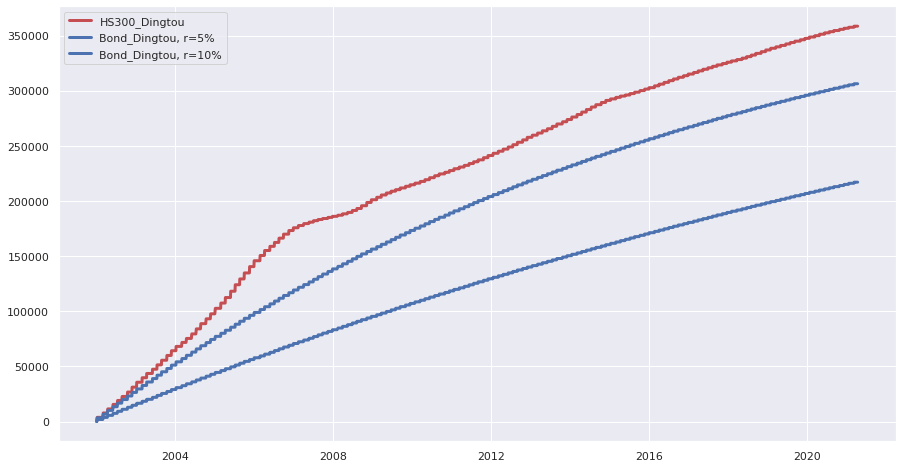

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.plot(hs300.index,hs300['dingtou_value'],c='r', lw=3, label='HS300_Dingtou')
plt.plot(hs300.index,hs300['bond_value1'],c='b', lw=3, label='Bond_Dingtou, r=5%')
plt.plot(hs300.index,hs300['bond_value2'],c='b', lw=3, label='Bond_Dingtou, r=10%')
plt.legend(loc='upper left', frameon=True)
plt.show()